In [1]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt


def znajdz(x, lista):
    '''
    Funkcja wyznacza indeks wierzchołka, do którego w danym kroku jest przyłączana krawędź
    '''
    sum = 0
    for i in range(len(lista)):
        sum+=lista[i]
        if x < sum:
            return i



# Podstawowy algorytm liczący współczynnik wzajemności

## parametry

In [2]:
alpha = 0.05
beta = 0.9
gamma = 0.05
d_in = 1
d_out = 1

## symulacja m - krotna

In [8]:
def wspolczynnik_wzajemnosci(alpha, beta, gamma, d_in, d_out):

    m = 1000

    wsp = [0]*m
    for k in range(m): 
        print(k)
        liczba_wierzchołków = 1
        n = 10000
        size = int((alpha + gamma)*n + 1000)

        macierz_krawędzi = np.zeros((size,size))
        macierz_krawędzi[0,0] = 1
        stopnie_in = [1 + d_in]
        stopnie_out = [1 + d_out]

        mian_in = 1 + d_in
        mian_out = 1 + d_out


        for i in range(n):
            u1 = uniform(0,1)
            if u1 < alpha:
                u2 = uniform(0,1)
                indeks = znajdz(u2 * mian_in, stopnie_in)
                macierz_krawędzi[liczba_wierzchołków, indeks] +=1
                stopnie_in.append(d_in)
                stopnie_in[indeks] +=1
                stopnie_out.append(1 + d_out)
                mian_in+=1+d_in
                mian_out+= 1 + d_out
                liczba_wierzchołków +=1

            elif u1 < alpha+beta:
                u3, u4 = uniform(0,1), uniform(0,1)
                indeks1 = znajdz(u3 * mian_in, stopnie_in)
                indeks2 = znajdz(u4 * mian_out, stopnie_out)
                macierz_krawędzi[indeks2,indeks1] +=1
                stopnie_in[indeks1] +=1
                stopnie_out[indeks2] +=1
                mian_in += 1
                mian_out += 1

            else:
                u2 = uniform(0, 1)
                indeks = znajdz(u2 * mian_out, stopnie_out)
                macierz_krawędzi[indeks, liczba_wierzchołków] += 1
                stopnie_in.append(1+d_in)
                stopnie_out[indeks] += 1
                stopnie_out.append(d_out)

                mian_in += 1 + d_in
                mian_out += 1 + d_out
                liczba_wierzchołków +=1



        suma = 0
        for i in range(liczba_wierzchołków):
            for j in range(i+1,liczba_wierzchołków):
                if macierz_krawędzi[i,j] < macierz_krawędzi[j,i]:
                    suma+= 2*macierz_krawędzi[i,j]
                else:
                    suma += 2*macierz_krawędzi[j,i]

        wsp[k] = suma/n
    return wsp

In [1]:
model1 = wspolczynnik_wzajemnosci(0.1,0.8,0.1,4,4)
model2 = wspolczynnik_wzajemnosci(0.1,0.8,0.1,2,1)
model3 = wspolczynnik_wzajemnosci(0.05,0.9,0.05,1,1)

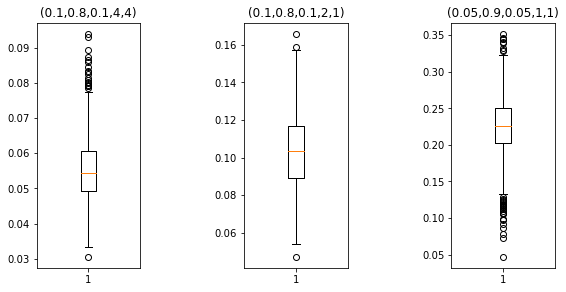

In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

model1 = [0.0536, 0.0578, 0.0676, 0.0558, 0.0682, 0.051, 0.0508, 0.0542, 0.055, 0.046, 0.058, 0.0586, 0.0568, 0.0586, 0.0648, 0.0592, 0.0554, 0.044, 0.059, 0.0494, 0.054, 0.042, 0.054, 0.0522, 0.0538, 0.0482, 0.052, 0.043, 0.0454, 0.0538, 0.0568, 0.0544, 0.0648, 0.0506, 0.0632, 0.0602, 0.0464, 0.0594, 0.0666, 0.0532, 0.0522, 0.0738, 0.0576, 0.066, 0.0496, 0.0514, 0.0476, 0.0604, 0.0578, 0.0464, 0.047, 0.0586, 0.0422, 0.0542, 0.0622, 0.0452, 0.0508, 0.045, 0.072, 0.0558, 0.0606, 0.0698, 0.0492, 0.0534, 0.0496, 0.0562, 0.056, 0.053, 0.0644, 0.0538, 0.0402, 0.0546, 0.058, 0.0566, 0.0502, 0.0432, 0.093, 0.0566, 0.0532, 0.067, 0.0802, 0.0518, 0.0814, 0.0554, 0.0672, 0.0436, 0.0626, 0.05, 0.0384, 0.0562, 0.0568, 0.0516, 0.0436, 0.0564, 0.0534, 0.0516, 0.0442, 0.066, 0.0648, 0.0574, 0.07, 0.0626, 0.0458, 0.055, 0.0494, 0.058, 0.0512, 0.0654, 0.0608, 0.0516, 0.0614, 0.047, 0.05, 0.0526, 0.0666, 0.0442, 0.0644, 0.0602, 0.0606, 0.0514, 0.0488, 0.0444, 0.0524, 0.0596, 0.0534, 0.0424, 0.0494, 0.0336, 0.0518, 0.0344, 0.0518, 0.054, 0.0438, 0.0484, 0.0368, 0.0472, 0.0448, 0.0376, 0.0492, 0.0526, 0.045, 0.0578, 0.052, 0.0498, 0.047, 0.0518, 0.0606, 0.0448, 0.0488, 0.0556, 0.0538, 0.054, 0.0512, 0.052, 0.052, 0.0548, 0.046, 0.0426, 0.0606, 0.0414, 0.047, 0.0546, 0.058, 0.0508, 0.053, 0.054, 0.0594, 0.0566, 0.0504, 0.0488, 0.0496, 0.0664, 0.0858, 0.0554, 0.057, 0.0436, 0.049, 0.0846, 0.0388, 0.0546, 0.0508, 0.0596, 0.0496, 0.0522, 0.0524, 0.054, 0.0488, 0.05, 0.0524, 0.0514, 0.0454, 0.0624, 0.0572, 0.0638, 0.0538, 0.0594, 0.0674, 0.0614, 0.0564, 0.0524, 0.052, 0.0616, 0.0608, 0.0668, 0.0464, 0.0502, 0.0662, 0.0544, 0.056, 0.0566, 0.0518, 0.0504, 0.076, 0.0394, 0.0482, 0.0496, 0.0566, 0.051, 0.0556, 0.0508, 0.0484, 0.0486, 0.046, 0.058, 0.0484, 0.0614, 0.065, 0.0552, 0.0622, 0.052, 0.0726, 0.0594, 0.068, 0.054, 0.0704, 0.0558, 0.0536, 0.0398, 0.0692, 0.0374, 0.0524, 0.0504, 0.0634, 0.0574, 0.0626, 0.0502, 0.0542, 0.0628, 0.0458, 0.0604, 0.0418, 0.0446, 0.0544, 0.0524, 0.0646, 0.0404, 0.0564, 0.0518, 0.0628, 0.0734, 0.0614, 0.05, 0.053, 0.0478, 0.069, 0.065, 0.0588, 0.0472, 0.0774, 0.0494, 0.051, 0.0446, 0.0704, 0.0424, 0.0588, 0.052, 0.0486, 0.0938, 0.0416, 0.0562, 0.0554, 0.0542, 0.049, 0.049, 0.0478, 0.052, 0.0724, 0.05, 0.0652, 0.0586, 0.0496, 0.0738, 0.0792, 0.061, 0.0498, 0.062, 0.0652, 0.048, 0.0678, 0.0546, 0.0542, 0.048, 0.0578, 0.047, 0.0622, 0.0528, 0.0478, 0.0488, 0.0558, 0.0628, 0.053, 0.059, 0.0668, 0.053, 0.0554, 0.0606, 0.0362, 0.0516, 0.0488, 0.0394, 0.0378, 0.0642, 0.0496, 0.0512, 0.0474, 0.0686, 0.0496, 0.0452, 0.0654, 0.0438, 0.0402, 0.0514, 0.0624, 0.0584, 0.0794, 0.057, 0.0516, 0.0798, 0.0586, 0.0476, 0.0522, 0.0602, 0.0452, 0.054, 0.046, 0.0544, 0.0584, 0.055, 0.0568, 0.0464, 0.0544, 0.0528, 0.0656, 0.0522, 0.0698, 0.056, 0.0622, 0.0702, 0.069, 0.0634, 0.0556, 0.0396, 0.0582, 0.0478, 0.0448, 0.0422, 0.0792, 0.0602, 0.0454, 0.077, 0.0586, 0.05, 0.0456, 0.0534, 0.057, 0.0424, 0.0616, 0.0586, 0.061, 0.05, 0.0482, 0.062, 0.073, 0.0638, 0.0748, 0.0502, 0.0534, 0.046, 0.0508, 0.062, 0.0608, 0.0606, 0.0634, 0.0808, 0.0654, 0.0416, 0.0458, 0.0556, 0.0594, 0.0494, 0.0498, 0.072, 0.0656, 0.0516, 0.0622, 0.06, 0.0666, 0.0406, 0.0576, 0.058, 0.0578, 0.048, 0.055, 0.0506, 0.06, 0.0414, 0.0632, 0.055, 0.0604, 0.048, 0.047, 0.0594, 0.0444, 0.0676, 0.0658, 0.068, 0.058, 0.0604, 0.0642, 0.0448, 0.0512, 0.052, 0.0548, 0.0608, 0.0592, 0.0586, 0.0462, 0.0572, 0.0716, 0.0452, 0.0506, 0.0544, 0.0638, 0.0578, 0.0408, 0.0356, 0.06, 0.0564, 0.0482, 0.0616, 0.059, 0.0608, 0.042, 0.062, 0.0702, 0.047, 0.0566, 0.0604, 0.068, 0.0622, 0.0586, 0.059, 0.0498, 0.055, 0.0492, 0.0534, 0.071, 0.0466, 0.0528, 0.0566, 0.044, 0.045, 0.0638, 0.0558, 0.0544, 0.0632, 0.0562, 0.0562, 0.0548, 0.0546, 0.0534, 0.0566, 0.0676, 0.047, 0.0412, 0.0412, 0.0598, 0.056, 0.0542, 0.0534, 0.045, 0.0574, 0.0586, 0.0556, 0.0756, 0.0658, 0.0626, 0.0474, 0.0518, 0.0408, 0.0688, 0.0516, 0.0456, 0.0562, 0.0508, 0.0504, 0.056, 0.0462, 0.0538, 0.0476, 0.056, 0.063, 0.0598, 0.0662, 0.0524, 0.0536, 0.0564, 0.058, 0.0488, 0.054, 0.0624, 0.067, 0.047, 0.0784, 0.059, 0.0482, 0.0668, 0.0524, 0.0614, 0.0512, 0.0486, 0.0528, 0.0362, 0.0534, 0.0628, 0.064, 0.0536, 0.0654, 0.0482, 0.0594, 0.0824, 0.0584, 0.057, 0.0448, 0.0474, 0.0744, 0.0472, 0.0642, 0.0608, 0.0512, 0.0506, 0.057, 0.0588, 0.0394, 0.0434, 0.05, 0.05, 0.059, 0.0552, 0.0456, 0.053, 0.0556, 0.0602, 0.0548, 0.0566, 0.0738, 0.0634, 0.0602, 0.0406, 0.0402, 0.053, 0.0564, 0.0608, 0.0564, 0.0708, 0.056, 0.041, 0.0608, 0.0664, 0.0564, 0.0484, 0.0488, 0.0614, 0.042, 0.0528, 0.0604, 0.0612, 0.0544, 0.0446, 0.062, 0.0642, 0.0542, 0.0574, 0.0448, 0.0336, 0.0612, 0.071, 0.0654, 0.0576, 0.0498, 0.0482, 0.0524, 0.045, 0.0646, 0.054, 0.0574, 0.0596, 0.0578, 0.0478, 0.0592, 0.0584, 0.047, 0.043, 0.054, 0.0562, 0.0682, 0.0406, 0.0578, 0.0446, 0.0476, 0.0556, 0.0522, 0.0768, 0.0646, 0.0492, 0.0488, 0.063, 0.0524, 0.072, 0.0638, 0.0516, 0.0478, 0.0466, 0.0766, 0.0526, 0.0526, 0.0744, 0.0864, 0.059, 0.0484, 0.0574, 0.0498, 0.0708, 0.0464, 0.049, 0.0588, 0.0436, 0.063, 0.0662, 0.0544, 0.0506, 0.0684, 0.0648, 0.0678, 0.0496, 0.0552, 0.0582, 0.0542, 0.0534, 0.048, 0.0432, 0.0582, 0.0432, 0.0466, 0.066, 0.063, 0.0636, 0.0564, 0.063, 0.0644, 0.0748, 0.0538, 0.0644, 0.0566, 0.0628, 0.054, 0.0504, 0.0476, 0.052, 0.0712, 0.0668, 0.0588, 0.0552, 0.0586, 0.0538, 0.0414, 0.042, 0.0556, 0.0672, 0.0532, 0.0568, 0.0634, 0.055, 0.065, 0.0502, 0.0562, 0.055, 0.0536, 0.0536, 0.0576, 0.0644, 0.054, 0.059, 0.0564, 0.0488, 0.0692, 0.0482, 0.0628, 0.0542, 0.0538, 0.0452, 0.0456, 0.0606, 0.047, 0.0676, 0.0524, 0.0558, 0.0448, 0.0556, 0.0542, 0.0336, 0.0512, 0.0594, 0.0558, 0.06, 0.0446, 0.0644, 0.0568, 0.0566, 0.0448, 0.041, 0.0574, 0.0544, 0.0536, 0.0584, 0.0534, 0.0566, 0.0668, 0.0524, 0.064, 0.0476, 0.0698, 0.0546, 0.0424, 0.0558, 0.046, 0.0454, 0.0534, 0.0552, 0.0466, 0.0488, 0.0496, 0.0614, 0.0466, 0.0548, 0.0592, 0.0684, 0.0716, 0.058, 0.0306, 0.0528, 0.0558, 0.0426, 0.0892, 0.0334, 0.0744, 0.0502, 0.0562, 0.0714, 0.0578, 0.0592, 0.0524, 0.0408, 0.0626, 0.0562, 0.0472, 0.0578, 0.0432, 0.051, 0.0522, 0.0464, 0.0498, 0.0462, 0.0474, 0.0528, 0.074, 0.0386, 0.0526, 0.0758, 0.0592, 0.0588, 0.0572, 0.0482, 0.0516, 0.0442, 0.0596, 0.064, 0.0428, 0.05, 0.0542, 0.0672, 0.0488, 0.052, 0.0546, 0.055, 0.0704, 0.0478, 0.05, 0.0622, 0.0376, 0.0506, 0.0476, 0.0494, 0.056, 0.0484, 0.065, 0.0672, 0.0874, 0.0684, 0.0586, 0.063, 0.0668, 0.0718, 0.0454, 0.0486, 0.0572, 0.0492, 0.043, 0.0692, 0.0592, 0.0488, 0.0618, 0.0548, 0.0524, 0.0568, 0.0432, 0.0552, 0.0552, 0.0444, 0.051, 0.0572, 0.0654, 0.0658, 0.0648, 0.0716, 0.0596, 0.0504, 0.0452, 0.0596, 0.0734, 0.0534, 0.0452, 0.053, 0.0652, 0.0584, 0.048, 0.054, 0.035, 0.0508, 0.0662, 0.0604, 0.0444, 0.0516, 0.0442, 0.0694, 0.0628, 0.05, 0.0606, 0.0434, 0.058, 0.0686, 0.0482, 0.053, 0.0768, 0.0426, 0.0694, 0.0558, 0.0586, 0.0496, 0.0576, 0.048, 0.0508, 0.058, 0.0588, 0.0566, 0.0422, 0.0542, 0.055, 0.0486, 0.0462, 0.054, 0.054, 0.062, 0.0534, 0.046, 0.0518, 0.0522, 0.056, 0.055, 0.083, 0.0504, 0.0566, 0.0636, 0.042, 0.056, 0.056, 0.0508, 0.063, 0.0378, 0.0644, 0.0668, 0.0542, 0.0594, 0.0472, 0.0492, 0.0418, 0.0594, 0.0496, 0.0532, 0.0682, 0.0432, 0.0424, 0.0712, 0.0508, 0.0532, 0.0642, 0.0544, 0.0524, 0.0626, 0.051, 0.064, 0.052, 0.064, 0.0368, 0.0554, 0.0506, 0.063, 0.042, 0.057, 0.0834, 0.0556, 0.0518, 0.063, 0.0608, 0.0716, 0.058, 0.041, 0.0506, 0.0532, 0.0482, 0.048, 0.0456, 0.0534, 0.0526, 0.046, 0.0392, 0.0556, 0.0512, 0.0536, 0.06, 0.0486, 0.0466, 0.0542, 0.0642, 0.0388, 0.0668, 0.0622, 0.0602, 0.0426, 0.0548, 0.076, 0.05, 0.0526, 0.06, 0.0494, 0.062, 0.0512, 0.0454, 0.0462, 0.0434, 0.0546, 0.0666, 0.0544, 0.0478, 0.0572, 0.0558, 0.0562, 0.0586, 0.0738, 0.0546, 0.0406, 0.0558, 0.0486, 0.0676, 0.047, 0.0454, 0.056, 0.0592, 0.0618, 0.0564]
model2 = [0.1026, 0.1116, 0.1446, 0.089, 0.1232, 0.1024, 0.1108, 0.118, 0.1014, 0.089, 0.0848, 0.1038, 0.1172, 0.0934, 0.1248, 0.0992, 0.1066, 0.1034, 0.0918, 0.0858, 0.1232, 0.1018, 0.0876, 0.1002, 0.0918, 0.079, 0.126, 0.1212, 0.0802, 0.115, 0.0912, 0.0718, 0.0876, 0.0892, 0.0974, 0.1036, 0.085, 0.1248, 0.1064, 0.1014, 0.079, 0.1484, 0.1136, 0.1024, 0.1176, 0.1118, 0.0986, 0.1094, 0.103, 0.1164, 0.1174, 0.128, 0.0888, 0.1098, 0.0596, 0.1044, 0.1136, 0.0866, 0.0916, 0.1212, 0.0968, 0.1072, 0.0688, 0.1044, 0.0992, 0.094, 0.1254, 0.136, 0.1142, 0.1316, 0.1172, 0.1186, 0.1062, 0.1096, 0.1142, 0.0762, 0.077, 0.0986, 0.0804, 0.081, 0.088, 0.1054, 0.0874, 0.1544, 0.0846, 0.1028, 0.1072, 0.1006, 0.1018, 0.095, 0.1064, 0.0766, 0.1226, 0.1076, 0.0892, 0.1146, 0.1338, 0.102, 0.0838, 0.0836, 0.1074, 0.104, 0.1066, 0.0798, 0.111, 0.0814, 0.0908, 0.1054, 0.0804, 0.1302, 0.099, 0.1132, 0.1296, 0.1148, 0.067, 0.1052, 0.1044, 0.0908, 0.124, 0.0928, 0.0972, 0.0988, 0.117, 0.0988, 0.1088, 0.102, 0.0772, 0.1026, 0.0624, 0.1204, 0.112, 0.0932, 0.1096, 0.113, 0.1352, 0.0946, 0.1156, 0.1244, 0.09, 0.102, 0.1178, 0.112, 0.1228, 0.1306, 0.114, 0.105, 0.1066, 0.1374, 0.055, 0.1152, 0.112, 0.112, 0.0978, 0.126, 0.088, 0.0974, 0.0994, 0.1158, 0.07, 0.1396, 0.1018, 0.098, 0.0744, 0.1046, 0.0632, 0.097, 0.1166, 0.0886, 0.0832, 0.0788, 0.1332, 0.1042, 0.1012, 0.0808, 0.0988, 0.0714, 0.0968, 0.0884, 0.0474, 0.0944, 0.0982, 0.105, 0.1068, 0.0664, 0.1282, 0.1112, 0.1276, 0.1038, 0.0852, 0.104, 0.1082, 0.1018, 0.1276, 0.0842, 0.1124, 0.0648, 0.1058, 0.1354, 0.0894, 0.1356, 0.1108, 0.1116, 0.0944, 0.1144, 0.1136, 0.1016, 0.113, 0.1016, 0.1256, 0.1422, 0.0824, 0.1084, 0.1176, 0.1206, 0.1102, 0.1162, 0.1248, 0.094, 0.0974, 0.1188, 0.0856, 0.1552, 0.1064, 0.1128, 0.0748, 0.0788, 0.0874, 0.1114, 0.1126, 0.082, 0.1268, 0.1352, 0.0912, 0.0976, 0.1256, 0.1418, 0.1184, 0.1286, 0.1082, 0.1036, 0.0954, 0.1078, 0.0738, 0.1032, 0.113, 0.1136, 0.0736, 0.1144, 0.1044, 0.1266, 0.1194, 0.1188, 0.0998, 0.0898, 0.0946, 0.1006, 0.1234, 0.0798, 0.1272, 0.0846, 0.0952, 0.0838, 0.1064, 0.0622, 0.1382, 0.1012, 0.124, 0.1034, 0.1084, 0.1156, 0.1136, 0.0864, 0.1294, 0.1164, 0.0882, 0.0838, 0.108, 0.1286, 0.0982, 0.0846, 0.0948, 0.1244, 0.0992, 0.133, 0.0812, 0.0992, 0.1016, 0.1204, 0.1134, 0.1238, 0.1068, 0.1118, 0.1246, 0.1036, 0.1006, 0.0858, 0.1064, 0.1018, 0.087, 0.125, 0.1082, 0.1062, 0.1234, 0.1142, 0.0788, 0.104, 0.1274, 0.118, 0.112, 0.0934, 0.1252, 0.0836, 0.0984, 0.0618, 0.1224, 0.0826, 0.0862, 0.1262, 0.062, 0.083, 0.1038, 0.124, 0.1008, 0.0944, 0.1248, 0.1088, 0.1316, 0.0956, 0.0906, 0.1164, 0.0974, 0.0838, 0.1206, 0.1128, 0.0702, 0.128, 0.1022, 0.078, 0.0958, 0.0832, 0.0786, 0.0806, 0.0794, 0.1262, 0.1026, 0.1064, 0.0832, 0.0868, 0.0906, 0.1314, 0.105, 0.0716, 0.0954, 0.1032, 0.118, 0.123, 0.1048, 0.1294, 0.1174, 0.1052, 0.0832, 0.0912, 0.1036, 0.1074, 0.0752, 0.0712, 0.1104, 0.109, 0.1074, 0.1246, 0.112, 0.0954, 0.1374, 0.1038, 0.1132, 0.0748, 0.087, 0.1246, 0.1228, 0.1056, 0.1202, 0.1334, 0.1396, 0.0632, 0.1216, 0.1082, 0.113, 0.1114, 0.1, 0.1056, 0.1358, 0.1218, 0.108, 0.0938, 0.11, 0.0892, 0.115, 0.0836, 0.0824, 0.1148, 0.1078, 0.1036, 0.133, 0.082, 0.1158, 0.104, 0.0982, 0.08, 0.0714, 0.1124, 0.0878, 0.1434, 0.0994, 0.0856, 0.1332, 0.1358, 0.0952, 0.0984, 0.108, 0.1098, 0.1036, 0.0864, 0.1042, 0.0626, 0.0786, 0.0744, 0.1264, 0.1028, 0.112, 0.1004, 0.054, 0.1046, 0.0638, 0.1002, 0.0928, 0.0792, 0.1088, 0.0894, 0.132, 0.0958, 0.0966, 0.0974, 0.1108, 0.1214, 0.1242, 0.0882, 0.1376, 0.107, 0.0996, 0.1198, 0.0984, 0.1046, 0.0928, 0.1308, 0.1018, 0.1048, 0.1174, 0.0788, 0.12, 0.1222, 0.0708, 0.1164, 0.147, 0.0864, 0.0912, 0.1464, 0.084, 0.0968, 0.0972, 0.114, 0.0984, 0.0898, 0.093, 0.0816, 0.1078, 0.1206, 0.0802, 0.12, 0.126, 0.1282, 0.0816, 0.0912, 0.1132, 0.1072, 0.1208, 0.1426, 0.1424, 0.09, 0.1022, 0.0936, 0.0548, 0.1164, 0.0948, 0.086, 0.093, 0.0922, 0.1174, 0.063, 0.0884, 0.0948, 0.1164, 0.1084, 0.1034, 0.1234, 0.106, 0.1068, 0.0854, 0.0874, 0.0646, 0.1186, 0.0808, 0.1176, 0.1094, 0.0946, 0.1362, 0.09, 0.1188, 0.0962, 0.1208, 0.1162, 0.0924, 0.1018, 0.1194, 0.09, 0.1442, 0.1098, 0.1252, 0.101, 0.0862, 0.1238, 0.1292, 0.113, 0.1316, 0.086, 0.1086, 0.0978, 0.1336, 0.1274, 0.0868, 0.1018, 0.1034, 0.1098, 0.0864, 0.095, 0.121, 0.121, 0.1066, 0.0736, 0.0962, 0.1258, 0.0952, 0.0894, 0.1312, 0.1144, 0.1232, 0.1288, 0.143, 0.1188, 0.1106, 0.1012, 0.0942, 0.1082, 0.1002, 0.1226, 0.0972, 0.1064, 0.0862, 0.1014, 0.097, 0.0932, 0.0842, 0.106, 0.1046, 0.0894, 0.0804, 0.0962, 0.1092, 0.0754, 0.1218, 0.0838, 0.1222, 0.1082, 0.0792, 0.09, 0.1328, 0.099, 0.0952, 0.0902, 0.0884, 0.1322, 0.122, 0.0998, 0.1048, 0.1348, 0.0762, 0.124, 0.071, 0.0892, 0.0848, 0.0854, 0.1032, 0.0994, 0.1126, 0.1114, 0.059, 0.0976, 0.131, 0.0772, 0.0838, 0.1122, 0.1424, 0.112, 0.087, 0.1208, 0.122, 0.0816, 0.0968, 0.0856, 0.1012, 0.0808, 0.1094, 0.1134, 0.1196, 0.0668, 0.127, 0.1096, 0.1262, 0.1034, 0.1194, 0.1036, 0.0684, 0.0862, 0.1316, 0.1528, 0.1106, 0.1282, 0.0916, 0.0942, 0.1004, 0.1046, 0.0726, 0.0864, 0.1074, 0.1244, 0.1322, 0.0984, 0.0782, 0.1204, 0.1244, 0.093, 0.068, 0.1228, 0.076, 0.1344, 0.1112, 0.0918, 0.114, 0.118, 0.1336, 0.1282, 0.0886, 0.0794, 0.0868, 0.0882, 0.1082, 0.127, 0.113, 0.0994, 0.0966, 0.1182, 0.1192, 0.0888, 0.1396, 0.112, 0.1176, 0.0648, 0.124, 0.0856, 0.0696, 0.1374, 0.0922, 0.0996, 0.0912, 0.0714, 0.0676, 0.0662, 0.106, 0.1308, 0.0856, 0.1172, 0.1136, 0.0972, 0.1146, 0.0776, 0.1192, 0.1212, 0.0804, 0.1294, 0.0906, 0.0872, 0.0594, 0.082, 0.0978, 0.1076, 0.092, 0.0666, 0.1122, 0.0946, 0.0756, 0.0878, 0.105, 0.1032, 0.1082, 0.097, 0.1328, 0.111, 0.1192, 0.0846, 0.1206, 0.1038, 0.0788, 0.1318, 0.1078, 0.1048, 0.1414, 0.1008, 0.0962, 0.0952, 0.0888, 0.1118, 0.0948, 0.133, 0.109, 0.1164, 0.1136, 0.1046, 0.0848, 0.074, 0.0778, 0.0838, 0.0612, 0.0902, 0.1258, 0.1074, 0.1126, 0.1014, 0.125, 0.0918, 0.1332, 0.122, 0.0926, 0.117, 0.1068, 0.0756, 0.1108, 0.0676, 0.0898, 0.1014, 0.1002, 0.1124, 0.1064, 0.0956, 0.0916, 0.0766, 0.0676, 0.1336, 0.0838, 0.1174, 0.1384, 0.0946, 0.0954, 0.1134, 0.1006, 0.1062, 0.086, 0.0718, 0.0672, 0.1656, 0.1198, 0.1112, 0.1076, 0.1058, 0.0858, 0.1232, 0.0988, 0.055, 0.1068, 0.1042, 0.0776, 0.117, 0.0986, 0.117, 0.1238, 0.1064, 0.1334, 0.0878, 0.1256, 0.0748, 0.0944, 0.1, 0.1052, 0.1162, 0.0972, 0.1256, 0.0832, 0.0884, 0.069, 0.1362, 0.1386, 0.101, 0.1238, 0.091, 0.1208, 0.1038, 0.1316, 0.1262, 0.0568, 0.0936, 0.139, 0.0766, 0.1132, 0.1162, 0.1094, 0.089, 0.0692, 0.1094, 0.0644, 0.1112, 0.096, 0.113, 0.1206, 0.0878, 0.0612, 0.086, 0.1028, 0.1194, 0.1068, 0.1004, 0.099, 0.1042, 0.1294, 0.1148, 0.0914, 0.064, 0.0932, 0.0944, 0.0964, 0.1048, 0.0978, 0.157, 0.0746, 0.0716, 0.1304, 0.1144, 0.1162, 0.0816, 0.126, 0.1066, 0.0998, 0.1162, 0.0966, 0.119, 0.1544, 0.1292, 0.0864, 0.116, 0.0824, 0.115, 0.0878, 0.0908, 0.1002, 0.0968, 0.105, 0.088, 0.068, 0.1288, 0.1406, 0.0944, 0.1164, 0.092, 0.1202, 0.0662, 0.1038, 0.0888, 0.0834, 0.0966, 0.1274, 0.098, 0.1066, 0.1178, 0.0994, 0.1174, 0.085, 0.0976, 0.075, 0.1028, 0.0742, 0.0896, 0.085, 0.1344, 0.0972, 0.1052, 0.1414, 0.1252, 0.1004, 0.1168, 0.1178, 0.1382, 0.0894, 0.1222, 0.0768, 0.1008, 0.076, 0.1032, 0.0912, 0.0804, 0.107, 0.1118, 0.0878, 0.0848, 0.0952, 0.1036, 0.1066, 0.095, 0.1084, 0.1068, 0.0888, 0.1356, 0.0906, 0.1068, 0.1176, 0.0974, 0.136, 0.107, 0.1148, 0.1258, 0.0992, 0.1214, 0.1322, 0.1062, 0.0902, 0.1046, 0.0682, 0.0742, 0.1392, 0.1488, 0.1156, 0.1272, 0.1062, 0.0854, 0.1026, 0.084, 0.159, 0.0788, 0.0996, 0.0874, 0.126, 0.13, 0.0834, 0.0942, 0.0746, 0.1116, 0.0736, 0.1142, 0.087, 0.0794, 0.1034, 0.123, 0.103, 0.1224, 0.1198, 0.1128, 0.0724, 0.0928, 0.0952, 0.114, 0.096, 0.1026, 0.084, 0.1234, 0.111, 0.0914, 0.0838, 0.1036, 0.0898, 0.0822, 0.1274, 0.1136, 0.0734, 0.095, 0.0912, 0.0896, 0.0948, 0.0628, 0.0914, 0.0622, 0.1248, 0.105, 0.1022, 0.1102]
model3 = [0.2, 0.2154, 0.2276, 0.249, 0.0992, 0.1966, 0.2418, 0.2534, 0.2146, 0.2964, 0.2776, 0.1472, 0.1922, 0.228, 0.2322, 0.2248, 0.242, 0.2128, 0.2404, 0.1336, 0.206, 0.2124, 0.2178, 0.1452, 0.2712, 0.1454, 0.201, 0.1122, 0.2018, 0.2264, 0.1832, 0.2414, 0.2516, 0.2154, 0.2908, 0.1914, 0.2256, 0.2198, 0.2324, 0.1898, 0.2252, 0.2722, 0.2952, 0.2642, 0.2724, 0.1574, 0.2018, 0.2292, 0.1758, 0.2352, 0.1958, 0.2426, 0.2002, 0.2264, 0.223, 0.2818, 0.242, 0.2222, 0.211, 0.2062, 0.228, 0.2266, 0.2214, 0.1912, 0.2602, 0.225, 0.2622, 0.2396, 0.2522, 0.2652, 0.226, 0.2332, 0.2204, 0.2344, 0.2156, 0.1694, 0.1796, 0.1682, 0.2322, 0.211, 0.2292, 0.2144, 0.2294, 0.203, 0.2066, 0.2452, 0.2346, 0.2856, 0.1988, 0.239, 0.1902, 0.124, 0.239, 0.2992, 0.2502, 0.2808, 0.1866, 0.2406, 0.2428, 0.2186, 0.2936, 0.1892, 0.27, 0.2692, 0.2404, 0.2634, 0.1934, 0.2052, 0.2518, 0.257, 0.2526, 0.284, 0.3444, 0.2492, 0.1802, 0.201, 0.224, 0.2404, 0.2286, 0.2314, 0.2284, 0.2694, 0.2528, 0.2138, 0.2566, 0.2, 0.2488, 0.2434, 0.346, 0.199, 0.2326, 0.2764, 0.2764, 0.2514, 0.2082, 0.1992, 0.279, 0.1154, 0.2114, 0.209, 0.2612, 0.2158, 0.2042, 0.2802, 0.2434, 0.157, 0.1458, 0.182, 0.2124, 0.2634, 0.274, 0.1968, 0.1764, 0.3048, 0.257, 0.2196, 0.0916, 0.3068, 0.1884, 0.2538, 0.2236, 0.2572, 0.2008, 0.2916, 0.2272, 0.2168, 0.1808, 0.2556, 0.2676, 0.2064, 0.194, 0.2012, 0.1872, 0.2332, 0.2062, 0.2348, 0.2798, 0.1774, 0.2202, 0.258, 0.2232, 0.1908, 0.2064, 0.1688, 0.2544, 0.2534, 0.3396, 0.255, 0.2142, 0.1946, 0.2158, 0.2096, 0.2366, 0.281, 0.2178, 0.2478, 0.2048, 0.1682, 0.2372, 0.2036, 0.2242, 0.1736, 0.2996, 0.1814, 0.2264, 0.212, 0.2312, 0.2156, 0.2354, 0.2204, 0.2584, 0.232, 0.2604, 0.1724, 0.2354, 0.2746, 0.1924, 0.1948, 0.2704, 0.2306, 0.2186, 0.2196, 0.2082, 0.2184, 0.23, 0.2572, 0.2182, 0.2518, 0.233, 0.2502, 0.3002, 0.218, 0.2032, 0.2246, 0.2028, 0.1936, 0.2496, 0.2332, 0.1818, 0.2422, 0.2396, 0.1578, 0.2616, 0.2558, 0.2618, 0.238, 0.231, 0.2524, 0.106, 0.2506, 0.1876, 0.2612, 0.2488, 0.232, 0.2212, 0.265, 0.2244, 0.1758, 0.2182, 0.2494, 0.174, 0.3284, 0.2194, 0.1932, 0.1946, 0.1492, 0.22, 0.182, 0.2526, 0.2188, 0.1908, 0.2186, 0.2908, 0.1924, 0.167, 0.2698, 0.2886, 0.2698, 0.1906, 0.2354, 0.2106, 0.2184, 0.2116, 0.2504, 0.2038, 0.1258, 0.2912, 0.2258, 0.2172, 0.217, 0.2752, 0.2528, 0.157, 0.1214, 0.2306, 0.255, 0.2256, 0.2336, 0.2198, 0.209, 0.2874, 0.154, 0.2088, 0.1232, 0.2404, 0.2582, 0.1852, 0.2146, 0.2154, 0.192, 0.2056, 0.1572, 0.3142, 0.257, 0.2518, 0.199, 0.2294, 0.2418, 0.189, 0.279, 0.2186, 0.2418, 0.226, 0.258, 0.2136, 0.2364, 0.228, 0.1628, 0.2206, 0.1854, 0.1602, 0.109, 0.2364, 0.276, 0.2356, 0.2442, 0.2204, 0.1658, 0.2712, 0.2296, 0.2088, 0.1988, 0.179, 0.2714, 0.2638, 0.2374, 0.2644, 0.2184, 0.2126, 0.2306, 0.2032, 0.2578, 0.2122, 0.2412, 0.2212, 0.232, 0.225, 0.2564, 0.1922, 0.2206, 0.1322, 0.2286, 0.2648, 0.1946, 0.225, 0.2248, 0.2052, 0.1906, 0.2214, 0.2504, 0.1894, 0.1856, 0.1922, 0.204, 0.204, 0.2462, 0.2008, 0.3402, 0.1718, 0.2228, 0.2902, 0.1774, 0.1532, 0.2118, 0.2604, 0.2928, 0.208, 0.2532, 0.192, 0.2118, 0.202, 0.213, 0.2334, 0.2052, 0.2132, 0.2916, 0.2178, 0.1158, 0.2288, 0.2828, 0.2424, 0.232, 0.2334, 0.2656, 0.2296, 0.225, 0.2462, 0.1074, 0.286, 0.23, 0.2684, 0.3132, 0.3514, 0.2892, 0.241, 0.272, 0.2244, 0.223, 0.2262, 0.2194, 0.186, 0.209, 0.2224, 0.2304, 0.2272, 0.2662, 0.2256, 0.225, 0.1824, 0.2736, 0.2536, 0.1834, 0.195, 0.3062, 0.2454, 0.2584, 0.1988, 0.2022, 0.2182, 0.2384, 0.0786, 0.2552, 0.2336, 0.1924, 0.172, 0.21, 0.2282, 0.2536, 0.2618, 0.1578, 0.2102, 0.179, 0.1648, 0.1468, 0.2216, 0.161, 0.2388, 0.2782, 0.221, 0.2798, 0.3094, 0.217, 0.2918, 0.1842, 0.2058, 0.217, 0.217, 0.226, 0.2492, 0.2078, 0.2408, 0.227, 0.2216, 0.2478, 0.264, 0.2624, 0.219, 0.2634, 0.2466, 0.2022, 0.2352, 0.2646, 0.2274, 0.1848, 0.2326, 0.2502, 0.1886, 0.287, 0.2672, 0.2134, 0.2136, 0.2308, 0.2284, 0.2798, 0.2238, 0.2398, 0.243, 0.2584, 0.2306, 0.2164, 0.282, 0.1876, 0.2546, 0.2328, 0.2436, 0.219, 0.1486, 0.2464, 0.2352, 0.2056, 0.186, 0.1934, 0.2278, 0.2298, 0.1662, 0.2662, 0.255, 0.21, 0.1986, 0.2688, 0.2248, 0.2296, 0.2048, 0.2658, 0.2416, 0.2114, 0.1748, 0.1948, 0.2942, 0.231, 0.2704, 0.2054, 0.2874, 0.206, 0.2894, 0.2142, 0.251, 0.1788, 0.218, 0.197, 0.303, 0.2356, 0.2508, 0.2058, 0.1548, 0.2234, 0.2034, 0.229, 0.2998, 0.2764, 0.2156, 0.241, 0.1984, 0.2386, 0.2212, 0.3302, 0.2348, 0.269, 0.1702, 0.2634, 0.147, 0.1986, 0.2628, 0.2344, 0.1184, 0.2378, 0.2274, 0.251, 0.2148, 0.306, 0.2324, 0.2486, 0.2618, 0.251, 0.2596, 0.2052, 0.2284, 0.2464, 0.2228, 0.238, 0.1824, 0.2024, 0.1522, 0.2316, 0.2414, 0.2438, 0.1998, 0.2266, 0.2162, 0.2016, 0.2054, 0.2014, 0.1196, 0.2596, 0.2648, 0.146, 0.2622, 0.2036, 0.2154, 0.1826, 0.2288, 0.2676, 0.2232, 0.2052, 0.2736, 0.197, 0.2266, 0.2366, 0.1942, 0.1562, 0.2166, 0.2802, 0.2332, 0.2598, 0.1288, 0.189, 0.213, 0.2242, 0.2458, 0.2106, 0.242, 0.259, 0.1744, 0.1972, 0.1716, 0.1344, 0.2074, 0.1916, 0.3222, 0.228, 0.2236, 0.2622, 0.2386, 0.2734, 0.2104, 0.195, 0.2436, 0.2132, 0.209, 0.1548, 0.1818, 0.3034, 0.1432, 0.2526, 0.162, 0.1888, 0.1988, 0.2472, 0.2328, 0.2152, 0.1778, 0.2228, 0.3092, 0.2254, 0.2666, 0.2246, 0.2372, 0.2306, 0.1704, 0.285, 0.1628, 0.1702, 0.2592, 0.1874, 0.312, 0.2112, 0.2336, 0.2276, 0.212, 0.2708, 0.2604, 0.2794, 0.242, 0.1502, 0.2964, 0.2494, 0.1412, 0.298, 0.1818, 0.1356, 0.2386, 0.2544, 0.2258, 0.1962, 0.2238, 0.1924, 0.2458, 0.2246, 0.2008, 0.2014, 0.19, 0.2536, 0.2776, 0.2364, 0.2818, 0.197, 0.26, 0.212, 0.2648, 0.2824, 0.2408, 0.1946, 0.2828, 0.2032, 0.1882, 0.1774, 0.2224, 0.2194, 0.1832, 0.1122, 0.1068, 0.199, 0.2174, 0.2206, 0.2302, 0.1934, 0.2744, 0.1884, 0.2386, 0.273, 0.2686, 0.2024, 0.2716, 0.1698, 0.1982, 0.282, 0.0472, 0.2318, 0.2426, 0.232, 0.2056, 0.1974, 0.273, 0.1862, 0.227, 0.2176, 0.2304, 0.2602, 0.2168, 0.269, 0.219, 0.2362, 0.219, 0.2316, 0.2732, 0.1902, 0.2322, 0.197, 0.1996, 0.2362, 0.2342, 0.2214, 0.2398, 0.2718, 0.2404, 0.2498, 0.2444, 0.2818, 0.2094, 0.1762, 0.198, 0.206, 0.18, 0.219, 0.1998, 0.2106, 0.213, 0.2734, 0.2296, 0.2384, 0.2204, 0.1698, 0.2272, 0.2182, 0.2342, 0.2566, 0.2352, 0.222, 0.2182, 0.1876, 0.2264, 0.1776, 0.143, 0.2126, 0.1756, 0.2042, 0.1856, 0.238, 0.1968, 0.186, 0.2576, 0.192, 0.2382, 0.2422, 0.1736, 0.2312, 0.174, 0.2114, 0.1486, 0.2442, 0.2586, 0.2388, 0.1634, 0.2248, 0.2554, 0.2298, 0.271, 0.1742, 0.2144, 0.2174, 0.1434, 0.2154, 0.2408, 0.1714, 0.227, 0.189, 0.231, 0.215, 0.209, 0.2574, 0.2172, 0.2818, 0.1936, 0.2122, 0.2244, 0.1626, 0.2206, 0.2208, 0.2886, 0.3002, 0.1776, 0.2526, 0.2514, 0.2998, 0.1886, 0.2594, 0.2172, 0.2118, 0.262, 0.26, 0.2442, 0.2222, 0.2394, 0.2378, 0.2548, 0.1964, 0.2318, 0.2482, 0.2156, 0.206, 0.2516, 0.2024, 0.2254, 0.2596, 0.2102, 0.2672, 0.2348, 0.2788, 0.2596, 0.1708, 0.242, 0.2208, 0.2464, 0.21, 0.274, 0.1898, 0.2526, 0.134, 0.212, 0.2104, 0.3318, 0.2596, 0.2042, 0.245, 0.2358, 0.2422, 0.2494, 0.233, 0.3104, 0.2314, 0.188, 0.2312, 0.2232, 0.2252, 0.264, 0.245, 0.2384, 0.2304, 0.3442, 0.2208, 0.2294, 0.223, 0.2068, 0.2124, 0.1814, 0.215, 0.1954, 0.2418, 0.226, 0.232, 0.211, 0.2416, 0.275, 0.2518, 0.2592, 0.224, 0.3026, 0.2074, 0.2246, 0.183, 0.2288, 0.2492, 0.2382, 0.2118, 0.186, 0.2774, 0.2076, 0.1604, 0.235, 0.249, 0.168, 0.2142, 0.1152, 0.2006, 0.2624, 0.241, 0.0978, 0.2574, 0.2362, 0.2072, 0.2612, 0.3026, 0.2296, 0.22, 0.1776, 0.2634, 0.2412, 0.0866, 0.25, 0.266, 0.2614, 0.1856, 0.2322, 0.213, 0.2162, 0.316, 0.1184, 0.2438, 0.1822, 0.194, 0.0728, 0.296, 0.2542, 0.2494, 0.2462, 0.2212, 0.2962, 0.2416, 0.2682, 0.1454, 0.2528, 0.1898, 0.2504, 0.2324, 0.1704, 0.2148, 0.2304, 0.2252, 0.1756, 0.2362, 0.223, 0.225, 0.2808, 0.2204, 0.2304, 0.227, 0.228, 0.1876, 0.2464, 0.1702, 0.2122, 0.2842, 0.207, 0.2436, 0.2682, 0.2148, 0.1554, 0.258, 0.2428, 0.2404, 0.2552, 0.1892, 0.3088, 0.241, 0.1756, 0.3098, 0.2192, 0.2074, 0.1692, 0.2672]

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.boxplot(model1)
ax2.boxplot(model2)
ax3.boxplot(model3)
ax1.set_title('(0.1,0.8,0.1,4,4)')
ax2.set_title('(0.1,0.8,0.1,2,1)')
ax3.set_title('(0.05,0.9,0.05,1,1)')
fig.subplots_adjust(left=0, right=1.2, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=1)
plt.savefig('wspolczynnikWzajemnosci1.png',bbox_inches='tight',facecolor='w')

# Symulacja dla ulepszonego modelu  (z pstwem p powstania krawędzi wzajemnej)

## parametry

In [18]:
alpha = 0.05
beta = 0.9
gamma = 0.05
d_in = 1
d_out = 1
p = 0.5

## algorytm

In [34]:
def wspolczynnik_wzajemnosci2(alpha, beta, gamma, d_in, d_out,p):

    m = 1000
    wsp = [0]*m
    for k in range(m): 
        liczba_wierzchołków = 1
        n = 10000
        size = int((alpha + gamma)*n + 1000)

        macierz_krawędzi = np.zeros((size,size))
        macierz_krawędzi[0,0] = 1
        stopnie_in = [1 + d_in]
        stopnie_out = [1 + d_out]

        mian_in = 1 + d_in
        mian_out = 1 + d_out
        l = n

        for i in range(n):
            u1 = uniform(0,1)
            bonus = np.random.binomial(1,p)
            l+=bonus
            if u1 < alpha:
                u2 = uniform(0,1)
                indeks = znajdz(u2 * mian_in, stopnie_in)
                macierz_krawędzi[liczba_wierzchołków, indeks] +=1
                macierz_krawędzi[indeks, liczba_wierzchołków]+=bonus
                stopnie_in.append(d_in)
                stopnie_in[indeks] +=1
                stopnie_out.append(1 + d_out)
                mian_in+=1+d_in
                mian_out+= 1 + d_out
                liczba_wierzchołków +=1

            elif u1 < alpha+beta:
                u3, u4 = uniform(0,1), uniform(0,1)
                indeks1 = znajdz(u3 * mian_in, stopnie_in)
                indeks2 = znajdz(u4 * mian_out, stopnie_out)
                macierz_krawędzi[indeks2,indeks1] +=1
                macierz_krawędzi[indeks1,indeks2]+=bonus
                stopnie_in[indeks1] +=1
                stopnie_out[indeks2] +=1
                mian_in += 1
                mian_out += 1

            else:
                u2 = uniform(0, 1)
                indeks = znajdz(u2 * mian_out, stopnie_out)
                macierz_krawędzi[indeks, liczba_wierzchołków] += 1
                macierz_krawędzi[liczba_wierzchołków, indeks]+=bonus
                stopnie_in.append(1+d_in)
                stopnie_out[indeks] += 1
                stopnie_out.append(d_out)

                mian_in += 1 + d_in
                mian_out += 1 + d_out
                liczba_wierzchołków +=1



        suma = 0
        for i in range(liczba_wierzchołków):
            for j in range(i+1,liczba_wierzchołków):
                if macierz_krawędzi[i,j] < macierz_krawędzi[j,i]:
                    suma+= 2*macierz_krawędzi[i,j]
                else:
                    suma += 2*macierz_krawędzi[j,i]

        wsp[k]+=suma/l
        
    return wsp

In [35]:
model4 = wspolczynnik_wzajemnosci2(0.1,0.8,0.1,4,4,0.2)
model5 = wspolczynnik_wzajemnosci2(0.1,0.8,0.1,2,1,0.2)
model6 = wspolczynnik_wzajemnosci2(0.05,0.9,0.05,1,1,0.2)

# Boxplot2

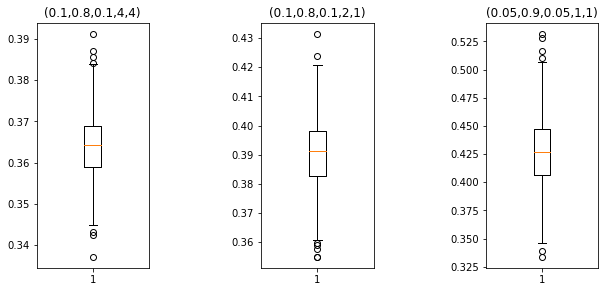

In [76]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.boxplot(model4)
ax2.boxplot(model5)
ax3.boxplot(model6)
ax1.set_title('(0.1,0.8,0.1,4,4)')
ax2.set_title('(0.1,0.8,0.1,2,1)')
ax3.set_title('(0.05,0.9,0.05,1,1)')
fig.subplots_adjust(left=0.2, right=1.5, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=1)
plt.savefig('wspolczynnikWzajemnosci2.png',bbox_inches='tight',facecolor='w')